<a href="https://colab.research.google.com/github/guptarishav/Sampling-of-Image/blob/main/Assignment_2(Sns).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-2

In [ ]:
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
f = cv2.imread('Rishav Kumar (B19ME066) - f.png')   #reading image as a matrix
f.shape

(1080, 1920, 3)

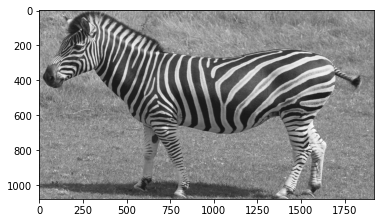

In [ ]:
import matplotlib.pylab as plt
plt.imshow(f)

## Task-1

In [ ]:
img1=np.zeros((1080,960,3),int)   #reducing number of column by half by taking alternate column
for i in range(1080):
  k=0
  for j in range(1920):
    if j%2==0:
      for p in range(3):
        img1[i][k][p]=int(f[i][j][p])
      k+=1
img1.shape

(1080, 960, 3)

In [ ]:
g=np.zeros((540,960,3),int)     #reducing number of rows by half by taking alternate rows
k=0
for i in range(1080):
  if i%2==0:
    for j in range(960):
        for p in range(3):
          g[k][j][p]=int(img1[i][j][p])
    k+=1
print(g.shape)

(540, 960, 3)


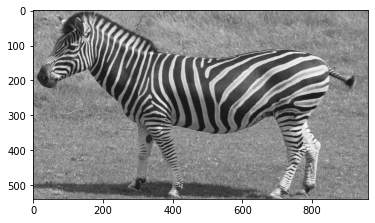

In [ ]:
import matplotlib.pylab as plt
plt.imshow(g)     #downsampled image

In [ ]:
g.shape

(540, 960, 3)

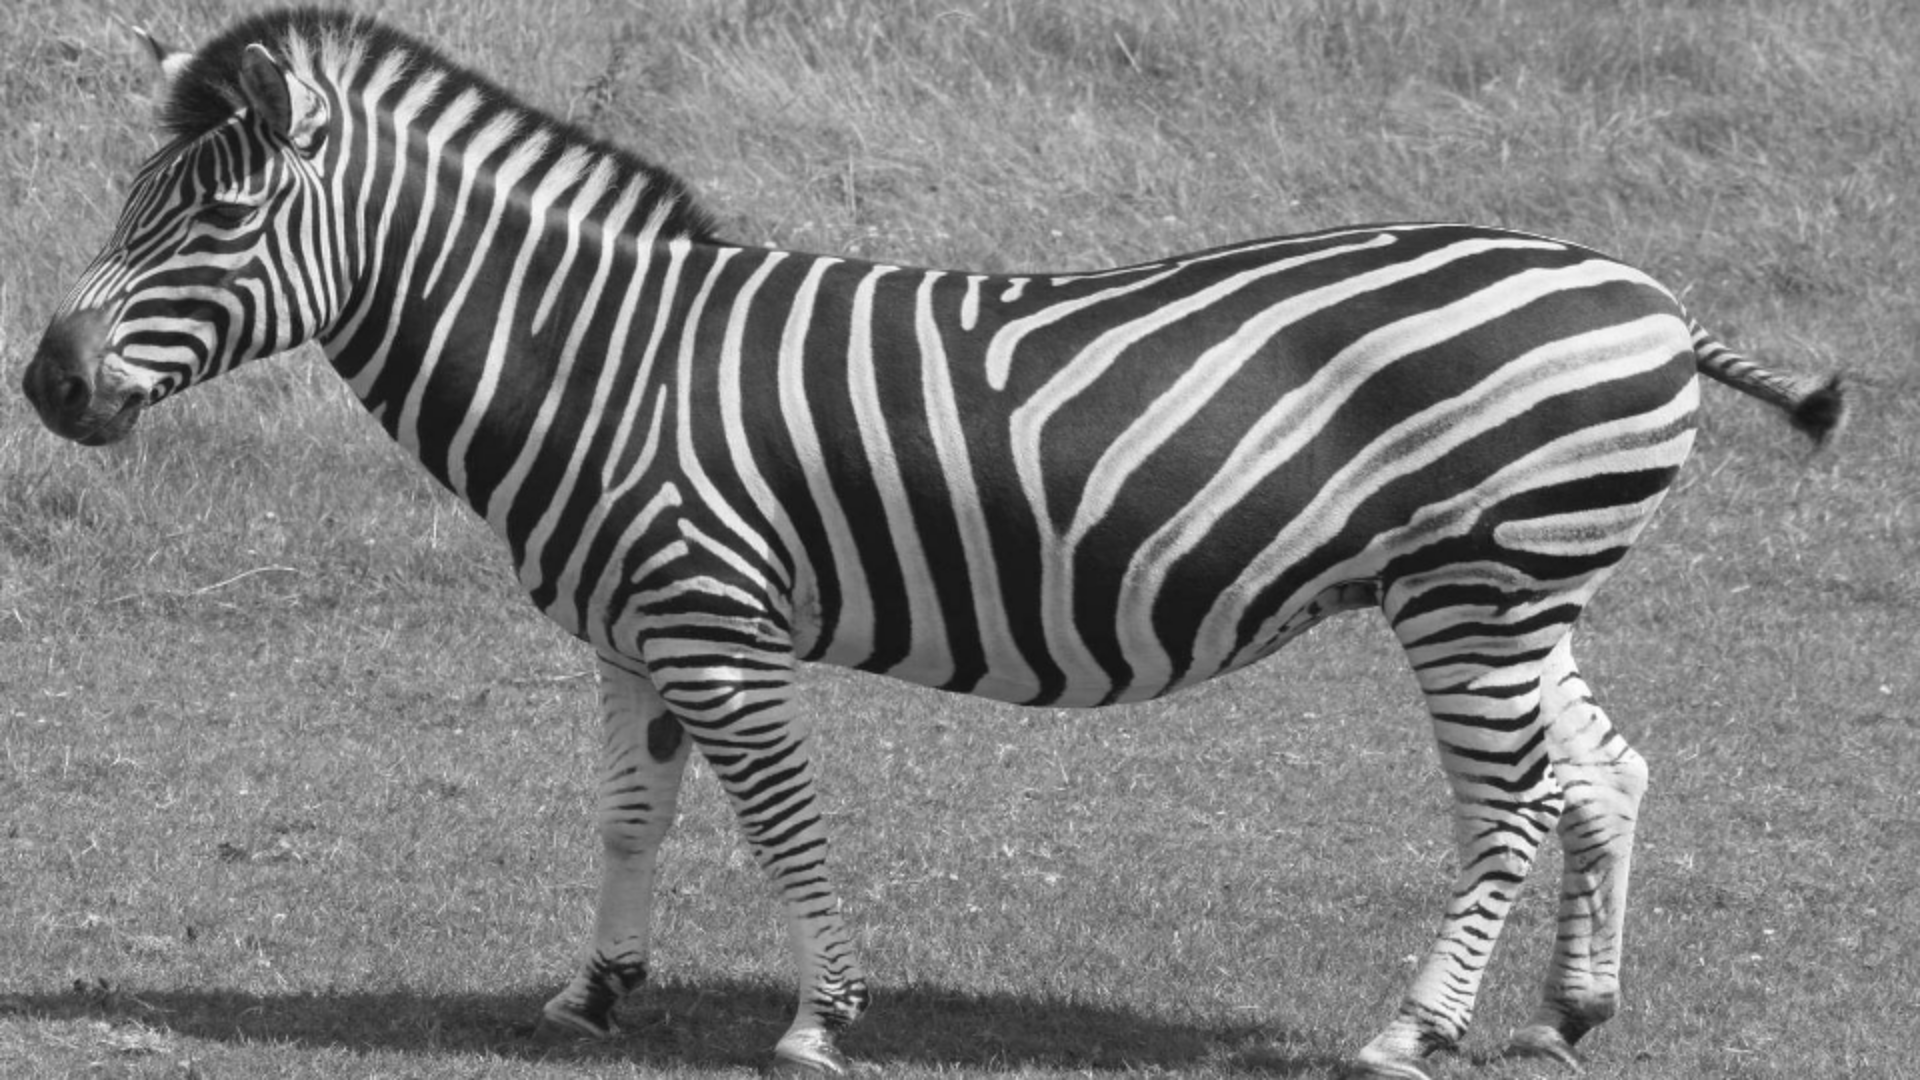

<Figure size 1440x144 with 0 Axes>

In [ ]:
g_u=cv2.resize(g.astype("float32"),None,fx=2,fy=2, interpolation= cv2.INTER_LINEAR)
cv2_imshow(g_u)  #upsample the image by increasing number of rows and columns by factor of 2.This will be carried out 
                        #here through linear interpolation

In [ ]:
g_u.shape

(1080, 1920, 3)

In [ ]:
diff=f-g_u   #difference in matrix  between original image and image obtained after interpolation
print(diff)

[[[  0.       0.       0.    ]
  [ -4.25    -4.25    -4.25  ]
  [ -3.75    -3.75    -3.75  ]
  ...
  [ -1.      -1.      -1.    ]
  [ -1.      -1.      -1.    ]
  [  0.       0.       0.    ]]

 [[  0.       0.       0.    ]
  [ -4.25    -4.25    -4.25  ]
  [ -4.75    -4.75    -4.75  ]
  ...
  [ -0.125   -0.125   -0.125 ]
  [ -0.375   -0.375   -0.375 ]
  [ -1.5     -1.5     -1.5   ]]

 [[  1.       1.       1.    ]
  [ -3.25    -3.25    -3.25  ]
  [ -2.75    -2.75    -2.75  ]
  ...
  [  0.625    0.625    0.625 ]
  [ -0.125   -0.125   -0.125 ]
  [ -2.5     -2.5     -2.5   ]]

 ...

 [[ -7.      -7.      -7.    ]
  [  0.75     0.75     0.75  ]
  [  5.25     5.25     5.25  ]
  ...
  [ -6.3125  -6.3125  -6.3125]
  [-10.4375 -10.4375 -10.4375]
  [ -2.5     -2.5     -2.5   ]]

 [[ -4.      -4.      -4.    ]
  [  0.75     0.75     0.75  ]
  [  2.25     2.25     2.25  ]
  ...
  [ -0.9375  -0.9375  -0.9375]
  [ -0.3125  -0.3125  -0.3125]
  [ 11.5     11.5     11.5   ]]

 [[ -5.      -5.      -5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


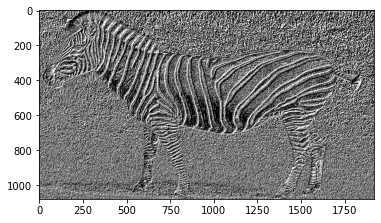

In [ ]:
plt.imshow(diff)    #visual difference between original image and interpolated image

## Task-2

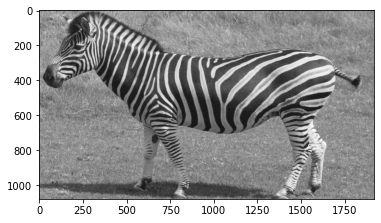

In [ ]:
kernel = np.ones((3,3),np.float32)/9    #2D Convolution ( Image Filtering)
fm = cv2.filter2D(f,-1,kernel)
plt.imshow(fm)

In [ ]:
img2=np.zeros((1080,960,3),int)      #reducing number of column by half by taking alternate column
for i in range(1080):
  k=0
  for j in range(1920):
    if j%2==0:
      for p in range(3):
        img2[i][k][p]=int(fm[i][j][p])
      k+=1
img2.shape

(1080, 960, 3)

In [ ]:
gm=np.zeros((540,960,3),int)      #reducing number of rows by half by taking alternate rows
k=0
for i in range(1080):
  if i%2==0:
    for j in range(960):
        for p in range(3):
          gm[k][j][p]=int(img2[i][j][p])
    k+=1
print(gm.shape)            #Here we get a downsample image

(540, 960, 3)


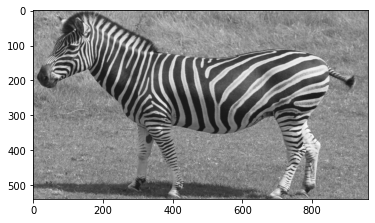

In [ ]:
plt.imshow(gm)  #downsampled image

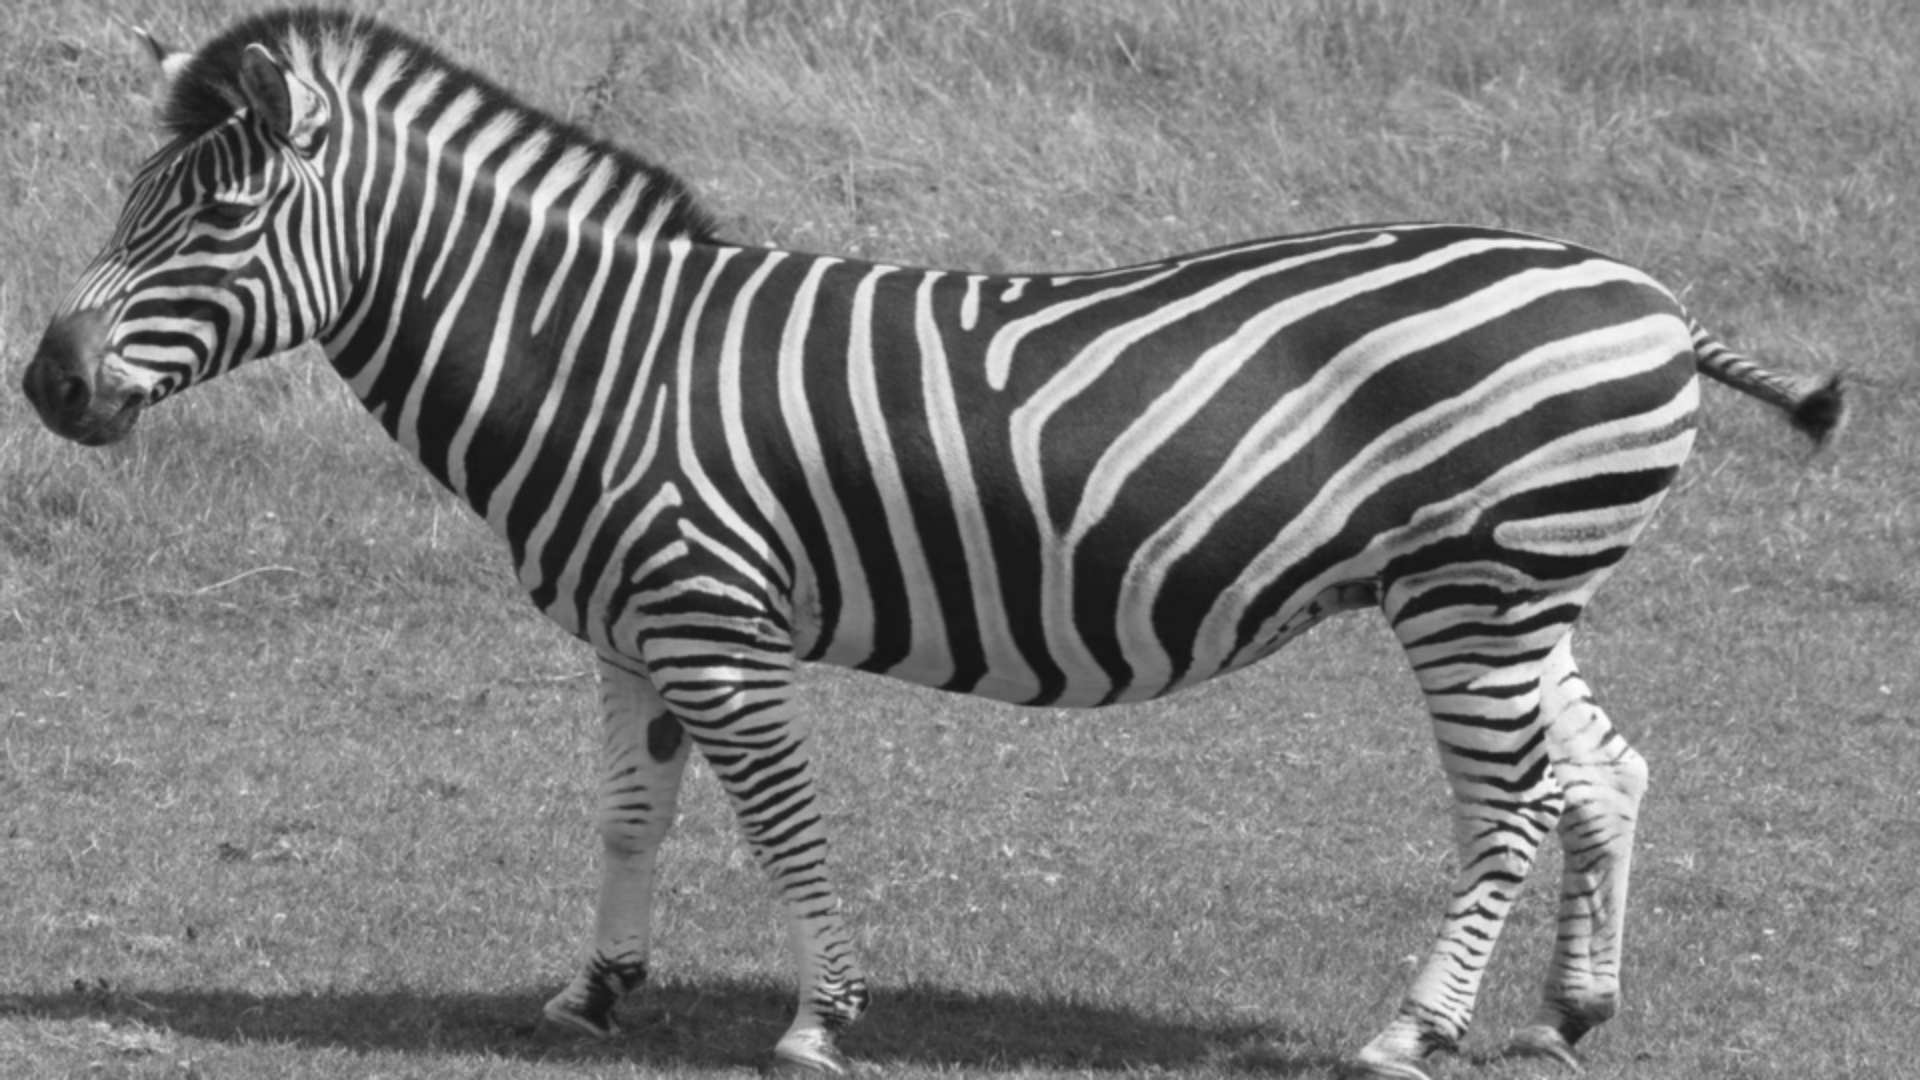

In [ ]:
gm_u=cv2.resize(gm.astype("float32"),None,fx=2,fy=2, interpolation= cv2.INTER_LINEAR)
cv2_imshow(gm_u)     #upsampling the downsample image by increasing number of rows and columns by factor of 2.This will be carried out 
                     #here through linear interpolation

In [ ]:
gm_u.shape

(1080, 1920, 3)

In [ ]:
diff1=f-gm_u   #difference between original image and filtered upsampled image
print(diff1)

[[[ 5.      5.      5.    ]
  [-0.75   -0.75   -0.75  ]
  [-3.25   -3.25   -3.25  ]
  ...
  [-1.25   -1.25   -1.25  ]
  [-1.75   -1.75   -1.75  ]
  [-1.     -1.     -1.    ]]

 [[ 4.75    4.75    4.75  ]
  [-1.     -1.     -1.    ]
  [-4.5    -4.5    -4.5   ]
  ...
  [-0.5    -0.5    -0.5   ]
  [-1.     -1.     -1.    ]
  [-2.25   -2.25   -2.25  ]]

 [[ 5.25    5.25    5.25  ]
  [-0.5    -0.5    -0.5   ]
  [-3.     -3.     -3.    ]
  ...
  [ 0.      0.      0.    ]
  [-0.5    -0.5    -0.5   ]
  [-2.75   -2.75   -2.75  ]]

 ...

 [[-1.25   -1.25   -1.25  ]
  [ 4.3125  4.3125  4.3125]
  [ 4.4375  4.4375  4.4375]
  ...
  [-9.0625 -9.0625 -9.0625]
  [-7.1875 -7.1875 -7.1875]
  [ 3.75    3.75    3.75  ]]

 [[-4.75   -4.75   -4.75  ]
  [-0.0625 -0.0625 -0.0625]
  [ 1.3125  1.3125  1.3125]
  ...
  [-3.6875 -3.6875 -3.6875]
  [-2.0625 -2.0625 -2.0625]
  [10.25   10.25   10.25  ]]

 [[-9.     -9.     -9.    ]
  [-3.75   -3.75   -3.75  ]
  [-0.25   -0.25   -0.25  ]
  ...
  [23.5    23.5    23.5 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


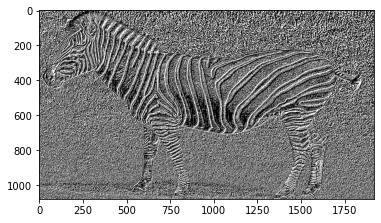

In [ ]:
plt.imshow(diff1)  #visual differe between original and filtered upsampled image

In [ ]:
from skimage.measure import compare_ssim as ssim 
s = ssim(f,g_u, multichannel = True)   #similarity between the image of task-1
print(s)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  
/usr/local/lib/python3.6/dist-packages/skimage/metrics/_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)


0.8752590483765225


In [ ]:
s1 = ssim(f,gm_u, multichannel = True)   #similarity between the image of task-2
print(s1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/skimage/metrics/_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)


0.8358068951052281


From above two result it is clear that task-1 upsampled image is visually closer to f.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


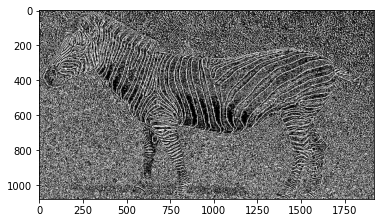

In [ ]:
#Now comparing difference of the both the differnce unsapled image from original image f
diff_=diff-diff1
plt.imshow(diff_)


From this it is clear that g_u is different from gm_u